# Création d'une application LLM basée sur RAG avec un pdf personnalisé : présentation du code

Les grands modèles linguistiques (LLM) sont omniprésents en termes de couverture, mais avouons-le, ils peuvent être un peu denses. Formés sur des jeux de données massifs, leurs connaissances restent verrouillées après la formation. Imaginez un bibliothécaire qui a lu tous les livres du monde, mais qui ne peut vous dire que ce qu'il a mémorisé il y a des années. Pas de nouvelles fraîches, pas de blagues, juste les mêmes vieilles informations.

Mais et si nous pouvions débloquer un nouveau niveau de LLM, un niveau toujours axé sur l'apprentissage et l'information ? C'est là qu'intervient la génération de récupération augmentée (RAG) ! RAG permet aux LLM d'aller au-delà de leurs connaissances statiques et de récupérer assez facilement des informations en temps réel. RAG exploite des sources externes, comme les documents internes de l'entreprise ou même votre courrier électronique personnel, pour mieux comprendre le contexte de vos requêtes. La difficulté à expliquer chaque détail diminue, car le LLM peut trouver les indices dont il a besoin pour vous donner la meilleure réponse.

Vous avez une question sur la dernière stratégie marketing ? RAG peut trouver des rapports et des présentations pertinents. Besoin d'aide avec un bug de codage délicat ? Il peut parcourir les forums internes et les bases de code pour trouver la réponse. Et oubliez les réponses génériques à consonance robotique : la connaissance du contexte de RAG lui permet de créer des réponses personnalisées qui donnent l'impression qu'elles ont été écrites juste pour vous.

Dans ce blog, nous allons passer en revue une implémentation de base de votre propre petit LLM avec la puissance de RAG ? Nous travaillerons à la création d'un tel LLM à partir de zéro.

# Flux de travail du système RAG

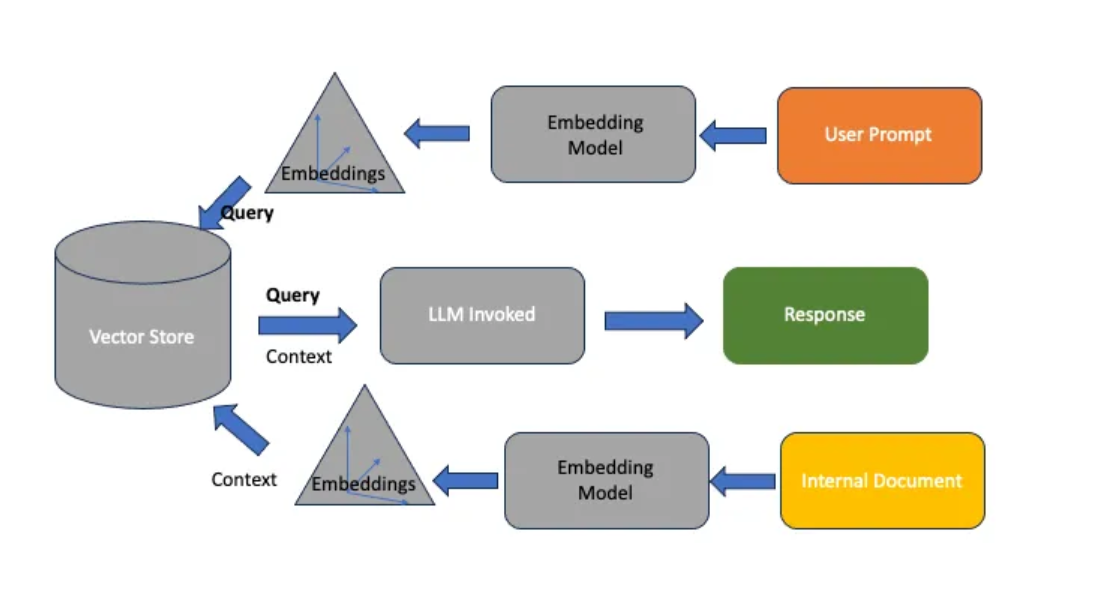

Bien que nous n’implémentions pas exactement un magasin de vecteurs, pour rester très simple, l’idée fonctionne à peu près de la même manière. Dans mes prochains blogs, je proposerai une implémentation plus détaillée du magasin de vecteurs permettant RAG.

# Flux d'un outil LLM compatible RAG :

Étape 1 : Rassemblez vos outils :

* Modèle Flan T5 : la centrale légère de Google, prête à apprendre et à s'adapter. L'utilisation conjointe de T5Tokenizer et de T5ForConditionalGeneration constitue la manière standard de travailler avec le modèle T5 pour diverses tâches de PNL telles que la réponse aux questions, le résumé de texte, la traduction et même l'écriture créative.

* Ensemble de données : un fichier PDF personnalisé adapté à vos besoins spécifiques, comme des articles de presse, des documents internes ou même vos propres écrits.

In [2]:
from transformers import T5ForConditionalGeneration, T5Tokenizer
import fitz 

model_name = "google/flan-t5-small"
tokenizer = T5Tokenizer.from_pretrained(model_name)
model = T5ForConditionalGeneration.from_pretrained(model_name)
text = ""

Étape 2 : Déverrouiller le texte coincé dans votre PDF :

Avec fitz, nous ouvrons le PDF, comptons les pages qu'il contient, parcourons chaque page, extrayons les connaissances cachées de chaque page ligne par ligne, puis rassemblons le texte extrait dans une variable (texte) pour répondre aux questions.

In [ ]:
"""
Extracts text from a PDF file.
"""
pdf_file_path = 'your_pdf_path.pdf'
pdf_text = extract_text_from_pdf(pdf_file_path)

text = ""
with fitz.open(pdf_path) as pdf_document:
    num_pages = pdf_document.page_count
    for page_num in range(num_pages):
        page = pdf_document[page_num]
        text += page.get_text()

Étape 3 : Activez le super pouvoir RAG :

L'intégration RAG de ChatPDF, c'est comme ajouter un peu de magie à votre petit T5. Nous avons la possibilité de choisir les sources de connaissances externes préférées, comme les bases de données en ligne ou les documents internes. Désormais, lorsque vous poserez une question à votre LLM, il s'appuiera non seulement sur ses connaissances acquises, mais consultera également ces sources externes pour connaître le contexte, élaborant ainsi des réponses précises et pertinentes à votre situation spécifique.

In [ ]:
# Define your query

user_question = "What is the main topic of the document?"
print(f"Question: {user_question}")


inputs = tokenizer.encode("question: " + question + " context: " + context, return_tensors="pt", max_length=512, truncation=True)
outputs = model.generate(inputs)
answer = tokenizer.decode(outputs[0], skip_special_tokens=True)
print(f"Answer: {answer}")

Ce code est un exemple simplifié avec un document PDF et peut nécessiter des ajustements en fonction de vos données spécifiques.

Assurez-vous que les bibliothèques nécessaires sont installées et remplacez les valeurs d'espace réservé par vos propres informations.
ChatPDF offre une interface utilisateur pour gérer les modèles et les sources de connaissances, qui peut être utilisée avec l'API pour plus de facilité d'utilisation.
N'oubliez pas que ce n'est qu'un point de départ. Vous pouvez développer ce code pour explorer différents ensembles de données, sources de connaissances et fonctionnalités. Amusez-vous à créer votre propre petit LLM et à libérer la puissance de RAG !